  Phillippines   Indonesia       Malta       India
0   Error Free  Error Free   Defective  Error Free
1   Error Free  Error Free  Error Free   Defective
2   Error Free   Defective   Defective  Error Free
3   Error Free  Error Free  Error Free  Error Free
4   Error Free  Error Free   Defective  Error Free
       Phillippines   Indonesia       Malta       India
count           300         300         300         300
unique            2           2           2           2
top      Error Free  Error Free  Error Free  Error Free
freq            271         267         269         280
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB
None


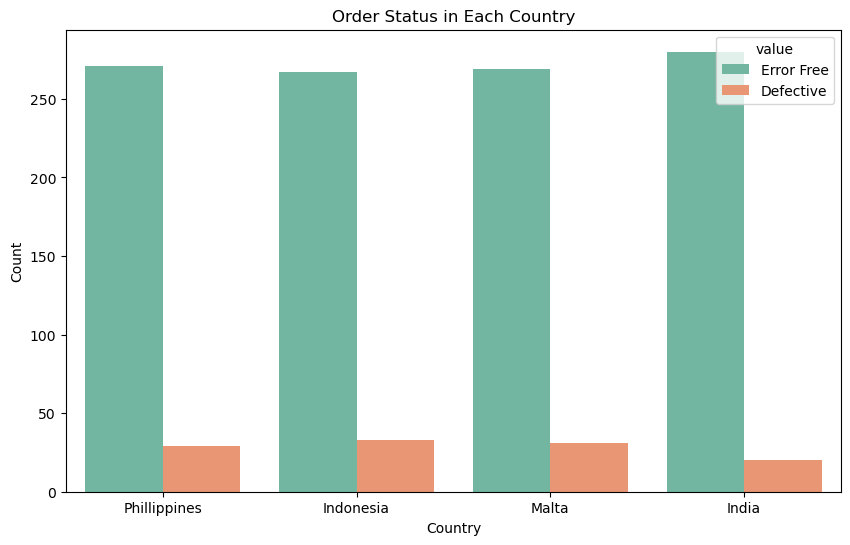

Contingency Table for Phillippines and Indonesia:
Indonesia     Defective  Error Free
Phillippines                       
Defective             2          27
Error Free           31         240
Chi-Square: 0.1856391005881107
P-value: 0.6665712150680798
Degrees of Freedom: 1
Fail to reject the null hypothesis(Ho),means there is no significant difference in defective percentages.
Contingency Table for Phillippines and Malta:
Malta         Defective  Error Free
Phillippines                       
Defective             4          25
Error Free           27         244
Chi-Square: 0.1043743747062788
P-value: 0.7466420539639729
Degrees of Freedom: 1
Fail to reject the null hypothesis(Ho),means there is no significant difference in defective percentages.
Contingency Table for Phillippines and India:
India         Defective  Error Free
Phillippines                       
Defective             2          27
Error Free           18         253
Chi-Square: 0.0
P-value: 1.0
Degrees of Freedom: 1
F

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\ass\\Costomer+OrderForm.csv")
list(df)

# EDA
print(df.head())
print(df.describe())
print(df.info())

# Countplot for order status in each country
plt.figure(figsize=(10, 6))
sns.countplot(data=df.melt(), x='variable', hue='value', palette='Set2')
plt.title('Order Status in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

columns = ['Phillippines', 'Indonesia', 'Malta', 'India']

# Iterate through each pair of columns and perform chi-square test
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        contingency_table = pd.crosstab(df[columns[i]], df[columns[j]])
        
        # Display the contingency table
        print(f"Contingency Table for {columns[i]} and {columns[j]}:")
        print(contingency_table)
        
        # Perform the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Display test statistics
        print(f"Chi-Square: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of Freedom: {dof}")
        
        # Compare p_value with (Significane Level)
        alpha = 0.05
        if p < alpha:
            print("Reject the null hypothesis(Ho),means there is a evidence of significant difference in defective percentages.")
        else:
            print("Fail to reject the null hypothesis(Ho),means there is no significant difference in defective percentages.")